In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os

plt.rcParams.update({
    "figure.dpi": 600,
    "figure.figsize": (6, 2.5),
    "font.size": 8,
    "mathtext.fontset": "stix"
})

In [10]:
active_passive_dict = np.load('/Users/susannedahle/CellTypeDependenceElStim/simulation_data/active_passive/vmem_amp_data_active_passive_bbp.npy', allow_pickle=True).item()

In [16]:
selected_cells = ['L4_BP_bIR215_5', "L5_MC_bAC217_1", "L5_TTPC2_cADpyr232_3", "L5_NGC_bNAC219_5", 'L4_SS_cADpyr230_1']

cell_cdm_colors = {
    'L4_BP_bIR215_5': "tab:orange",
    "L5_MC_bAC217_1": "tab:blue",
    "L5_TTPC2_cADpyr232_3": "tab:green",
    "L5_NGC_bNAC219_5": 'tab:red',
    'L4_SS_cADpyr230_1': 'tab:purple'
}

cell_base = {
    'L4_BP_bIR215_5': {'name': 'L4 BP', 'color_passive': 'tab:grey', 'color_active': 'tab:orange'},
    'L5_MC_bAC217_1': {'name': 'L5 MC', 'color_passive': 'tab:cyan', 'color_active': 'tab:blue'},
    'L5_TTPC2_cADpyr232_3': {'name': 'L5', 'color_passive': 'tab:olive', 'color_active': 'tab:green'},
    'L5_NGC_bNAC219_5': {'name': 'L5 NGC', 'color_passive': 'tab:brown', 'color_active': 'tab:red'},
    'L4_SS_cADpyr230_1': {'name': 'L4 SS', 'color_passive': 'tab:pink', 'color_active': 'tab:purple'},
}

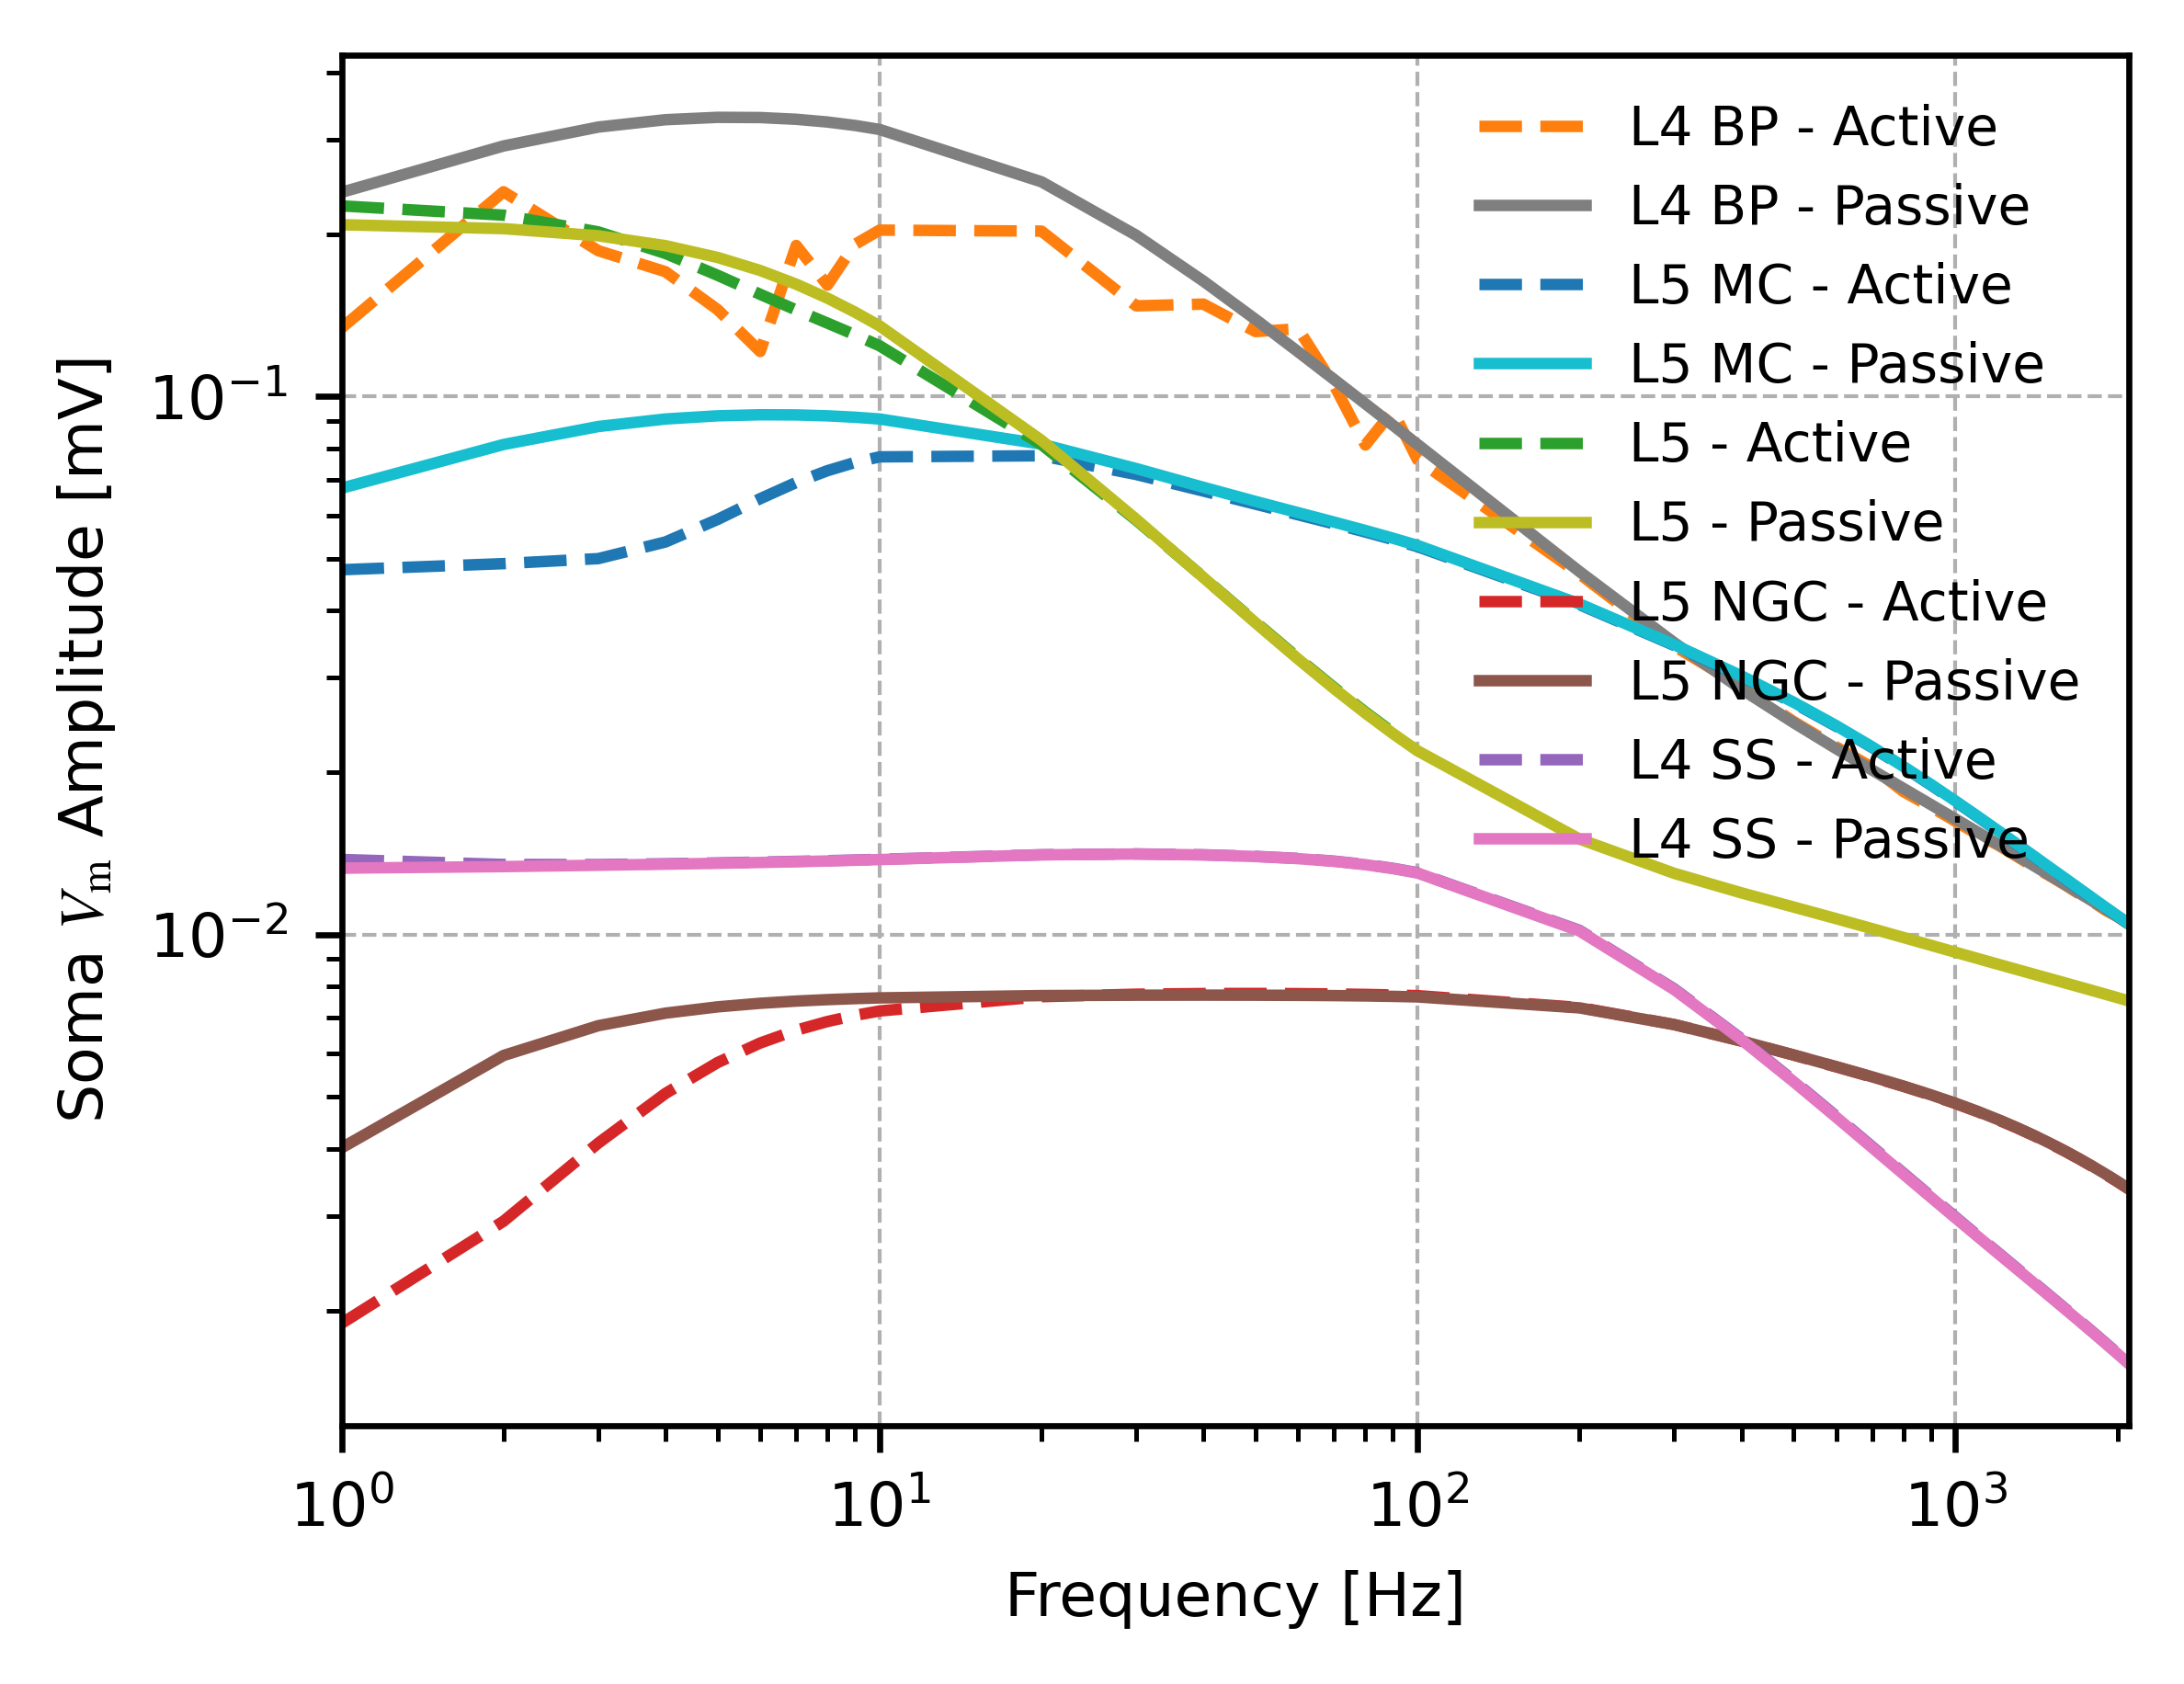

In [17]:
fig, ax = plt.subplots(figsize=(4, 4))

for cell_name, data in active_passive_dict.items():
    frequencies = data['freq']
    amplitudes = data ['soma_amps']

    base, state = cell_name.rsplit('_', 1)
    label = f"{cell_base[base]['name']} - {state.capitalize()}"

    if state == 'active':
        linestyle = '--'
        color = cell_base[base]['color_active']
    else:
        linestyle = '-'
        color = cell_base[base]['color_passive']

    ax.loglog(
        frequencies,
        amplitudes,
        label=label,
        color=color,
        linestyle = linestyle
    )

ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Soma $V_\\mathrm{m}$ Amplitude [mV]')
ax.set_xlim(left=frequencies[0], right=frequencies[-1])
ax.grid(linestyle='--', linewidth=0.5)
ax.legend(loc='upper right', fontsize=7, frameon=False)
ax.set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()
